<h1>Desafio do Módulo 1 do Bootcamp de Datascience da Alura</h1>

<p>Para esse desafio iremos analisar a base de dados BRASIL.IO da COVID-19 para tentarmos entender se há diferença na taxa de mortalidade da doença para diferentes regiões e se sim quais fatores podem explicar essa diferença. Para isso levantaremos algumas hipóteses e iremos testá-las com os dados que conseguirmos obter.</p> 

In [1]:
#Reading files

import pandas as pd 

file_path='../dados/caso.csv'

df=pd.read_csv(file_path)

#Cleaning data and creating aux columns

df['date']=pd.to_datetime(df['date'])

df['state_line']=df.apply(lambda row: 1 if row['city_ibge_code']<100 else 0,axis=1)

df.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,state_line
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,1
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,1
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,1
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,1
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,1


<h2>Taxa de mortalidade por Estado e Município</h2>

Text(0.5, 0.94, 'Graf1: Taxa de Mortalidade e Casos Confirmados')

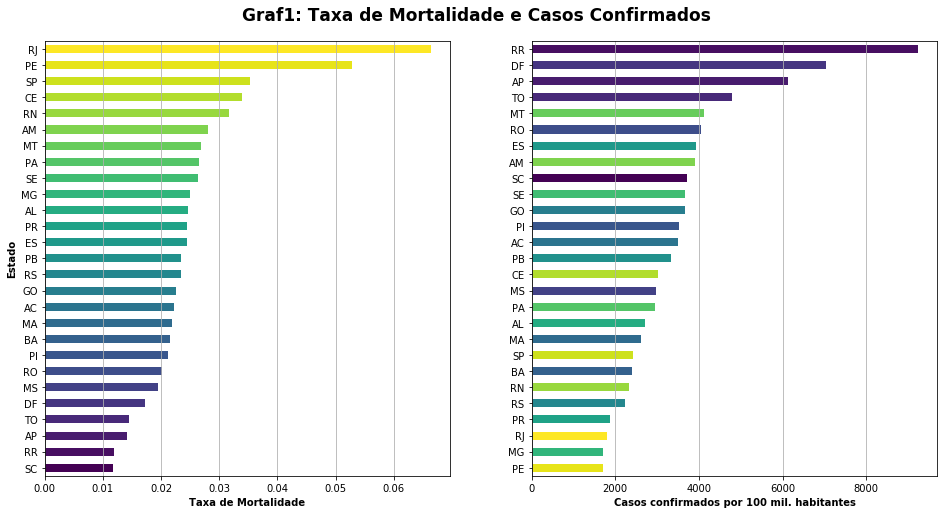

In [2]:
#Death rate by state

import matplotlib.pyplot as plt
from matplotlib import cm

df_death_rate=df[(df.state_line==1) & (df.is_last==True)][['state','death_rate']]

#colormap
viridis = cm.get_cmap('viridis', len(df_death_rate))
color_map=viridis.colors

#plot_first_figure
fig, axs = plt.subplots(1, 2, figsize=(16,8))

ax=(df_death_rate
    .sort_values(by='death_rate',ascending=True)
    .plot(x='state',y='death_rate',kind='barh',ax=axs[0],color=color_map))

#color dic
dic_col={}

for state,color in zip(df_death_rate.sort_values(by='death_rate',ascending=True)['state'],color_map):

    dic_col[state]=color

ax.xaxis.grid(True)
ax.get_legend().remove()

xlabel=ax.set_xlabel('Taxa de Mortalidade',fontweight='bold')
ylabel=ax.set_ylabel('Estado',fontweight='bold')

df_conf_rate=df[(df.state_line==1) & (df.is_last==True)][['state','confirmed_per_100k_inhabitants']]

#New color map

re_color=[]

for state,i in zip(df_conf_rate.sort_values(by='confirmed_per_100k_inhabitants',ascending=True)['state']
                                                                            ,range(len(df_death_rate))):

     a=dic_col[state]
     re_color.append(a)



#plot second figure
ax_1=(df_conf_rate
    .sort_values(by='confirmed_per_100k_inhabitants',ascending=True)
    .plot(x='state',y='confirmed_per_100k_inhabitants',kind='barh',ax=axs[1],color=re_color))

ax_1.get_legend().remove()
ax_1.set_ylabel('')
ax_1.xaxis.grid(True)
ax_1.set_xlabel('Casos confirmados por 100 mil. habitantes',fontweight='bold')

plt.suptitle('Graf1: Taxa de Mortalidade e Casos Confirmados',y=0.94,fontweight='bold',fontsize=17)



<p>Observamos acima que a taxa de mortalidade por estado varia consideravelmente, com o estado do Rio de Janeiro tendo uma taxa de mortalidade duas vezes maior que o Estado de São Paulo e <b> mais de seis vezes </b> o de Santa Catarina.</p>
<br>
<p>O gráfico da direita parece sugerir que os Estados com maior mortalidade apenas contaram os casos mais graves, mesmo assim ainda temos estados que testaram bastante e possuem uma alta taxa de letalidade.</p>
<br>
<p>Entender essas diferenças é importante pois o Rio de Janeiro é um estado populoso e caso a taxa de mortalidade na região fosse menor mais vidas teriam sido salvas.</p>
<br>
<p>Mas antes de assumir proseguir com a análise devemos fazer algumas hipóteses sobre o que pode explicar essa diferença.</p>
<h2>Hipóteses</h2>
<ul>
<li>Os estados que registraram os primeiros casos tiveram dificulade para reagir devido a falta de conhecimento sobre a doença.</li>
<li>Estados que investem mais em saúde tiveram taxas de mortalidade menores.</li>
</ul>




<h3>Primeira Hipótese: Estados ou regiões que registraram os primeiros casos primeiro tiveram maior dificulade em combater a COVID-19.</h3>

(737475.0, 737509.0)

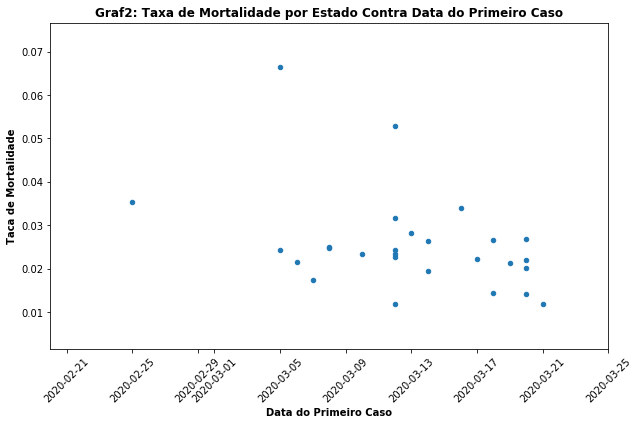

In [3]:
df_first_case=df[(df.state_line==1) & (df.order_for_place==1)][['date','state']].sort_values(by='date')

df_merged=pd.merge(df_death_rate,
            df_first_case,
            how='left',
            left_on='state',
            right_on='state')

ax_2=df_merged.plot.scatter(x='date',y='death_rate',rot=45,figsize=(10,6))
ax_2.set_xlabel('Data do Primeiro Caso',fontweight='bold')
ax_2.set_ylabel('Taca de Mortalidade',fontweight='bold')
title=ax_2.set_title('Graf2: Taxa de Mortalidade por Estado Contra Data do Primeiro Caso'
    ,fontweight='bold'
    ,fontsize='large')

ax_2.set_xlim(pd.to_datetime('2020-02-20'),pd.to_datetime('2020-03-25'))

<p>Por estado parece ter uma relação negativa entre a data do primeiro caso e a taxa de mortalidade. Vamos analisar por município para termos uma visão mais granular.</p>

Número de municípios com taxa de mortalidade menor que 0.5: 5582


(0, 0.1)

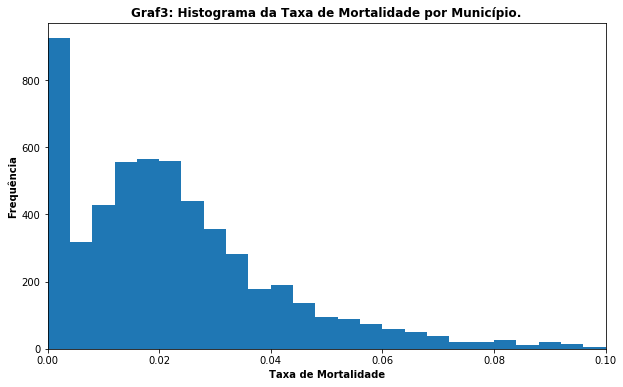

In [4]:
#Death rate by city

df_death_rate_city=df[(df.state_line!=1) & (df.is_last==True)][['city_ibge_code','city','death_rate','order_for_place']]

df_death_rate_city=df_death_rate_city[df_death_rate_city.death_rate<0.5]

print(f'Número de municípios com taxa de mortalidade menor que 0.5: {len(df_death_rate_city)}')

ax_3=df_death_rate_city.plot(y='death_rate',kind='hist',bins=100,figsize=(10,6))
title=ax_3.set_title('Graf3: Histograma da Taxa de Mortalidade por Município.'
    ,fontweight='bold'
    ,fontsize='large')

ax_3.get_legend().remove()

ax_3.set_ylabel('Frequência',fontweight='bold')
ax_3.set_xlabel('Taxa de Mortalidade',fontweight='bold')
ax_3.set_xlim(0,0.1) #Para eliminar alguns outliers da base

<p>Pelo histograma acima a taxa de mortalidade varia bastante no nível município. Vamos analisar a seguir se municípios que registraram os primeiros casos mais tarde tiveram uma taxa de mortalidade menor.</p>

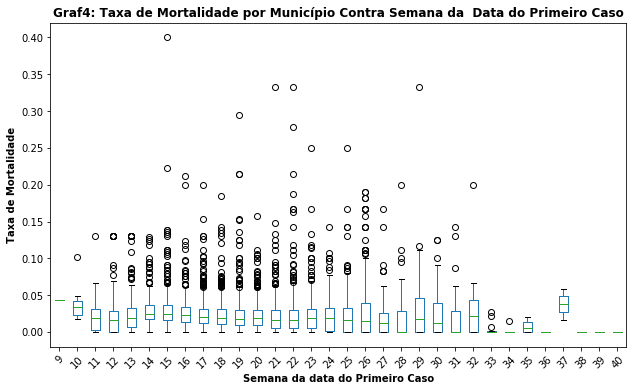

In [5]:
df_first_case_city=df[(df.state_line!=1) & (df.order_for_place==1)][['date','city_ibge_code','city']].sort_values(by='date')

df_merged2=pd.merge(df_death_rate_city,
                    df_first_case_city,
                    how='left',
                    left_on='city_ibge_code',
                    right_on='city_ibge_code')
            
df_merged2['semana']=df_merged2.date.dt.week
df_merged2=df_merged2[['death_rate','semana']]

ax_4=df_merged2.boxplot(by='semana',rot=45,figsize=(10,6),grid=False)

ax_4.get_figure().suptitle('')

ax_4.set_xlabel('Semana da data do Primeiro Caso',fontweight='bold')
ax_4.set_ylabel('Taxa de Mortalidade',fontweight='bold')
title=ax_4.set_title('Graf4: Taxa de Mortalidade por Município Contra Semana da  Data do Primeiro Caso'
    ,fontweight='bold'
    ,fontsize='large')

#ax_4.set_xlim(pd.to_datetime('2020-03-01'),pd.to_datetime('2020-11-10'))
#ax_4.set_ylim(0,130)

<p>No gráfico acima observamos como há ruído no dado municipal. Primeiro há muitos outliers nos dados em nível municipal, outro ponto é como o terceiro quartil também varia de semana para semana. Podemos observar quão estável é a taxa de mortalidade ao longo das semanas. Municípios que foram afetados tardiamente não obtiveram uma melhora nos índicadores de mortalidade. Levando a crer em algumas conclusões:<ul><li>O vírus não ficou menos agressivo ao longo do tempo</li><li>O conhecimento técnico da doença ou informações de como combate-lá não foram passadas de forma eficiente ao longo do tempo.</li></ul><p>

<h3>Segunda Hipótese: Estados ou munícipios que gastaram mais com saúde registraram uma taxa de mortalidade menor da COVID-19.</h3>

<p>Para testarmos essa hipótese fizemos uma extração da base do DATASUS onde na linha eu coloquei a opção Procedimento e na Coluna o Estado. O valor é o valor do serviço hospitalar.<p>   

In [6]:
df_proc_estados=pd.read_csv('../dados/A135234189_28_143_208.csv',encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=11,
                    thousands=".", decimal=",")

df_proc_estados.tail(5)

,Procedimento,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
5288,0803010117 UNIDADE DE REMUNERAÇÃO PARA DESLOCA...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5289,0803010125 UNIDADE DE REMUNERAÇÃO PARA DESLOCA...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5290,0803010133 UNIDADE DE REMUNERAÇÃO P/DESLOCAMEN...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5291,0803010141 UNIDADE DE REMUNERAÇÃO P/DESLOCAMEN...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5292,Total,56603203.71,16892218.17,105273430.86,18044271.29,222777960.98,13822707.33,47034050.84,190021666.15,102957198.00,...,552967571.54,1989757288.25,732939388.10,381016381.72,612566916.06,116730598.60,94699882.26,235754012.34,147325897.31,8428598561.64


In [7]:
#Vamos achar os procedimentos que contêm COVID em sua descrição

proced_covid=[x for x in df_proc_estados.Procedimento.tolist() if 'COVID' in x]

df_proc_estados=df_proc_estados[df_proc_estados.Procedimento.isin(proced_covid)]

df_proc_estados.set_index('Procedimento',inplace=True)

df_proc_estados

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Procedimento,,,,,,,,,,,,,,,,,,,,,
0101010095 PREVENÇÃO AO COVID-19 NAS ESCOLAS,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0214010163 TESTE RÁPIDO PARA DETECÇÃO DE SARS-COVID-2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0303010223 TRATAMENTO DE INFECÇÃO PELO CORONAVIRUS  COVID 19,9114244.88,1447305.79,21154840.92,2896986.65,34177489.94,2727484.03,4550115.59,31559569.90,17815455.01,47787359.25,...,71302448.33,273313143.85,36303060.98,27549972.70,41137223.93,3847723.73,11318576.21,18454719.75,20558618.42,930940685.81
0802010296 DIÁRIA DE UTI II ADULTO - SÍNDROME RESPIRATÓRIA AGUDA GRAVE (SRAG) - COVID19,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0802010300 DIÁRIA UTI II PEDIÁTRICA - SÍNDROME RESPIRATÓRIA AGUDA GRAVE (SRAG) - COVID19,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


Coeficiente de Correlação: 0.27


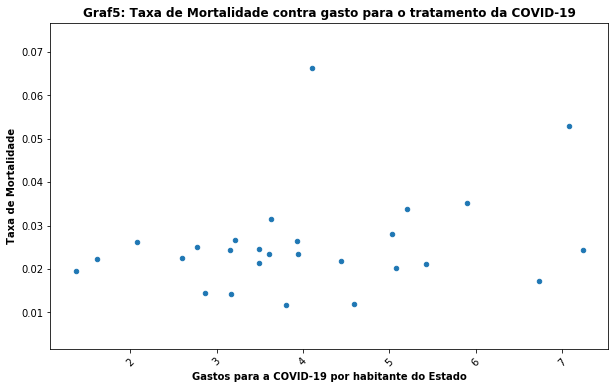

In [8]:
gasto_por_estado=df_proc_estados.drop(columns='Total').iloc[2].astype('float')

df_death_rate=df[(df.state_line==1) & (df.is_last==True)][['state','death_rate','estimated_population']]

df_merged3=pd.merge(df_death_rate,
                   gasto_por_estado,
                   how='left',
                   left_on='state',
                   right_index=True)

df_merged3['Gasto_por_hab']=df_merged3['0303010223 TRATAMENTO DE INFECÇÃO PELO CORONAVIRUS  COVID 19']/df_merged3['estimated_population']

ax_5=df_merged3.plot.scatter(x='Gasto_por_hab',y='death_rate',rot=45,figsize=(10,6))
ax_5.set_ylabel('Taxa de Mortalidade',fontweight='bold')
ax_5.set_xlabel('Gastos para a COVID-19 por habitante do Estado',fontweight='bold')
ax_5.set_title('Graf5: Taxa de Mortalidade contra gasto para o tratamento da COVID-19'
    ,fontweight='bold'
    ,fontsize='large')

corr=df_merged3[['death_rate','Gasto_por_hab']].corr().values[0,1]

print(f'Coeficiente de Correlação: {corr:.2f}')

<p>Aqui devemos ter cautela ao analisarmos esta relação posítiva. Estados que tiveram mais dificuldade no combate a COVID-19 possivelmente pediram ou necessitaram de mais recursos do Governo Federal o que explica o valor positivo da correlação entre gasto e taxa de mortalidade.</p>

<h2>Considerações finais.</h2>
<p>Da análise acima há evidências de que a data do primeiro caso paeceu não impactar a taxa de letalidade. O por que disso talvez seja a falta de coordenação das autoridades para o combate a COVID-19. Também parece que os estados necessitaram de recursos extrar do governo para combater a doença, mas esses recursos não mitigaram os efeitos da doença.</p>